In [86]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

# CV2 Example
Taken from [this tutorial](https://learnopencv.com/understanding-lens-distortion/)

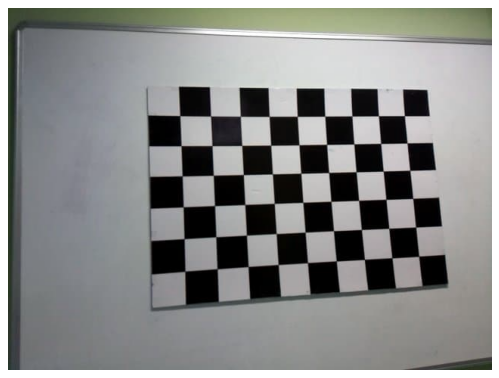

In [87]:
checker_board_image = cv2.imread("checkerboard.jpg")
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(checker_board_image)

In [88]:
patternSize = (9, 6)
retval, corners = cv2.findChessboardCorners(checker_board_image, patternSize)
print(type(corners[0][0][0]))
print(corners)

<class 'numpy.float32'>
[[[543.4887  329.0943 ]]

 [[507.54837 331.7395 ]]

 [[471.4346  333.85507]]

 [[434.50592 336.20285]]

 [[396.6122  337.71027]]

 [[357.24588 340.62732]]

 [[318.7152  342.3668 ]]

 [[277.5199  347.22797]]

 [[235.03368 348.6984 ]]

 [[539.50287 291.27798]]

 [[503.61072 292.79272]]

 [[467.64194 294.2903 ]]

 [[430.49478 296.00516]]

 [[392.7562  297.5426 ]]

 [[354.77185 299.9542 ]]

 [[315.20245 301.63843]]

 [[275.0513  304.06824]]

 [[233.43553 306.7868 ]]

 [[535.4161  252.99242]]

 [[500.15598 254.62874]]

 [[463.9941  255.79524]]

 [[427.04916 256.96063]]

 [[390.10632 258.31097]]

 [[352.07742 259.99353]]

 [[313.6273  260.88272]]

 [[272.5815  261.90933]]

 [[231.99458 264.38712]]

 [[531.49756 216.0742 ]]

 [[496.13287 217.30183]]

 [[460.1872  217.77948]]

 [[423.973   219.07097]]

 [[387.07135 219.75134]]

 [[349.69742 221.00099]]

 [[311.12958 221.80586]]

 [[271.6618  222.68274]]

 [[230.53444 223.57384]]

 [[527.6578  179.9309 ]]

 [[492.9623  1

In [89]:
objp = np.zeros((1, patternSize[0] * patternSize[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 
print(objp)

[[[0. 0. 0.]
  [1. 0. 0.]
  [2. 0. 0.]
  [3. 0. 0.]
  [4. 0. 0.]
  [5. 0. 0.]
  [6. 0. 0.]
  [7. 0. 0.]
  [8. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]
  [2. 1. 0.]
  [3. 1. 0.]
  [4. 1. 0.]
  [5. 1. 0.]
  [6. 1. 0.]
  [7. 1. 0.]
  [8. 1. 0.]
  [0. 2. 0.]
  [1. 2. 0.]
  [2. 2. 0.]
  [3. 2. 0.]
  [4. 2. 0.]
  [5. 2. 0.]
  [6. 2. 0.]
  [7. 2. 0.]
  [8. 2. 0.]
  [0. 3. 0.]
  [1. 3. 0.]
  [2. 3. 0.]
  [3. 3. 0.]
  [4. 3. 0.]
  [5. 3. 0.]
  [6. 3. 0.]
  [7. 3. 0.]
  [8. 3. 0.]
  [0. 4. 0.]
  [1. 4. 0.]
  [2. 4. 0.]
  [3. 4. 0.]
  [4. 4. 0.]
  [5. 4. 0.]
  [6. 4. 0.]
  [7. 4. 0.]
  [8. 4. 0.]
  [0. 5. 0.]
  [1. 5. 0.]
  [2. 5. 0.]
  [3. 5. 0.]
  [4. 5. 0.]
  [5. 5. 0.]
  [6. 5. 0.]
  [7. 5. 0.]
  [8. 5. 0.]]]


In [90]:
h,w = checker_board_image.shape[:2]
gray = cv2.cvtColor(checker_board_image,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[647.15779136   0.         356.98475118]
 [  0.         644.5164534  224.81299291]
 [  0.           0.           1.        ]]
dist : 

[[ 5.44855856e-01 -5.51263195e+00 -5.42386595e-04  2.31457680e-02
   1.89310790e+01]]
rvecs : 

[array([[-0.39834702],
       [ 0.22336849],
       [ 3.06361002]])]
tvecs : 

[array([[ 4.8317169 ],
       [ 2.73906323],
       [17.43096351]])]


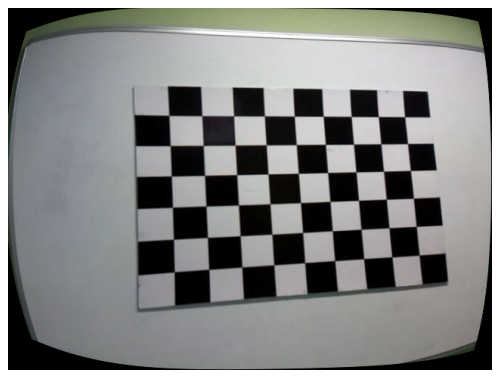

In [91]:
# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
 
# Method 1 to undistort the image
dst = cv2.undistort(checker_board_image, mtx, dist, None, newcameramtx)
 
# Method 2 to undistort the image
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
 
dst = cv2.remap(checker_board_image, mapx,mapy,cv2.INTER_LINEAR)
 
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dst)

# Implementation

[(740, 384), (1086, 381), (1430, 381), (1777, 381), (2121, 384), (2123, 725), (2126, 1066), (2126, 1410), (2126, 1757), (2126, 2106), (2126, 2453), (2123, 2799), (2121, 3143), (2118, 3482), (2115, 3824), (1771, 3824), (1771, 3485), (1774, 3144), (1774, 2800), (1777, 2454), (1779, 2107), (1779, 1760), (1779, 1411), (1779, 1065), (1774, 720), (1430, 720), (1430, 1061), (1430, 1410), (1430, 1754), (1430, 2106), (1430, 2453), (1427, 2799), (1427, 3149), (1425, 3487), (1425, 3824), (1081, 3827), (737, 3821), (734, 3483), (1081, 3485), (1081, 3147), (732, 3142), (732, 2798), (1078, 2803), (1078, 2454), (729, 2454), (729, 2104), (1078, 2104), (1081, 1760), (732, 1758), (732, 1411), (734, 1064), (1081, 1064), (1081, 1408), (1086, 720), (737, 722), (399, 53), (399, 386), (394, 722), (391, 1066), (391, 1410), (388, 1757), (391, 2098), (386, 2453), (386, 2797), (391, 3138), (394, 3480), (396, 3819), (738, 4152), (399, 4150), (1079, 4158), (1426, 4158), (1770, 4155), (2114, 4150), (2450, 4152), (2

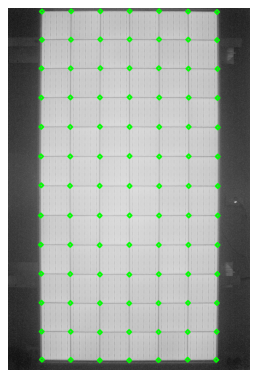

In [92]:
csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/chessboard_points.csv"
df = pd.read_csv(csv_path)

points = list(zip(df["x"], df['y']))
print(points)

image_path = "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060/LRE504055180800401088_IMG_8667.JPG"
image = cv2.imread(image_path)

for point in points:
    image = cv2.drawMarker(image, point, (0,255,0), cv2.MARKER_DIAMOND, 50, 20)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image)

In [93]:
corners = np.array([[[y, x]] for (x, y) in points], np.float32)
print(corners)

[[[ 384.  740.]]

 [[ 381. 1086.]]

 [[ 381. 1430.]]

 [[ 381. 1777.]]

 [[ 384. 2121.]]

 [[ 725. 2123.]]

 [[1066. 2126.]]

 [[1410. 2126.]]

 [[1757. 2126.]]

 [[2106. 2126.]]

 [[2453. 2126.]]

 [[2799. 2123.]]

 [[3143. 2121.]]

 [[3482. 2118.]]

 [[3824. 2115.]]

 [[3824. 1771.]]

 [[3485. 1771.]]

 [[3144. 1774.]]

 [[2800. 1774.]]

 [[2454. 1777.]]

 [[2107. 1779.]]

 [[1760. 1779.]]

 [[1411. 1779.]]

 [[1065. 1779.]]

 [[ 720. 1774.]]

 [[ 720. 1430.]]

 [[1061. 1430.]]

 [[1410. 1430.]]

 [[1754. 1430.]]

 [[2106. 1430.]]

 [[2453. 1430.]]

 [[2799. 1427.]]

 [[3149. 1427.]]

 [[3487. 1425.]]

 [[3824. 1425.]]

 [[3827. 1081.]]

 [[3821.  737.]]

 [[3483.  734.]]

 [[3485. 1081.]]

 [[3147. 1081.]]

 [[3142.  732.]]

 [[2798.  732.]]

 [[2803. 1078.]]

 [[2454. 1078.]]

 [[2454.  729.]]

 [[2104.  729.]]

 [[2104. 1078.]]

 [[1760. 1081.]]

 [[1758.  732.]]

 [[1411.  732.]]

 [[1064.  734.]]

 [[1064. 1081.]]

 [[1408. 1081.]]

 [[ 720. 1086.]]

 [[ 722.  737.]]

 [[  53.  

In [94]:
patternSize = (13, 7)
objp = np.zeros((1, patternSize[0] * patternSize[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 
print(objp)

[[[ 0.  0.  0.]
  [ 1.  0.  0.]
  [ 2.  0.  0.]
  [ 3.  0.  0.]
  [ 4.  0.  0.]
  [ 5.  0.  0.]
  [ 6.  0.  0.]
  [ 7.  0.  0.]
  [ 8.  0.  0.]
  [ 9.  0.  0.]
  [10.  0.  0.]
  [11.  0.  0.]
  [12.  0.  0.]
  [ 0.  1.  0.]
  [ 1.  1.  0.]
  [ 2.  1.  0.]
  [ 3.  1.  0.]
  [ 4.  1.  0.]
  [ 5.  1.  0.]
  [ 6.  1.  0.]
  [ 7.  1.  0.]
  [ 8.  1.  0.]
  [ 9.  1.  0.]
  [10.  1.  0.]
  [11.  1.  0.]
  [12.  1.  0.]
  [ 0.  2.  0.]
  [ 1.  2.  0.]
  [ 2.  2.  0.]
  [ 3.  2.  0.]
  [ 4.  2.  0.]
  [ 5.  2.  0.]
  [ 6.  2.  0.]
  [ 7.  2.  0.]
  [ 8.  2.  0.]
  [ 9.  2.  0.]
  [10.  2.  0.]
  [11.  2.  0.]
  [12.  2.  0.]
  [ 0.  3.  0.]
  [ 1.  3.  0.]
  [ 2.  3.  0.]
  [ 3.  3.  0.]
  [ 4.  3.  0.]
  [ 5.  3.  0.]
  [ 6.  3.  0.]
  [ 7.  3.  0.]
  [ 8.  3.  0.]
  [ 9.  3.  0.]
  [10.  3.  0.]
  [11.  3.  0.]
  [12.  3.  0.]
  [ 0.  4.  0.]
  [ 1.  4.  0.]
  [ 2.  4.  0.]
  [ 3.  4.  0.]
  [ 4.  4.  0.]
  [ 5.  4.  0.]
  [ 6.  4.  0.]
  [ 7.  4.  0.]
  [ 8.  4.  0.]
  [ 9.  4.  0.]
  [10.  

In [95]:
h,w = image.shape[:2]
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[3.24709454e+02 0.00000000e+00 1.42296094e+03]
 [0.00000000e+00 3.01280199e+02 2.13507611e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-6.49421499e-06 -6.18515484e-07 -1.94728662e-05 -4.35842505e-05
  -5.87035372e-08]]
rvecs : 

[array([[-968910.0858096 ],
       [-922109.73858447],
       [8737492.40560078]])]
tvecs : 

[array([[-102738.20452945],
       [ 114909.62381221],
       [ -48947.36116479]])]


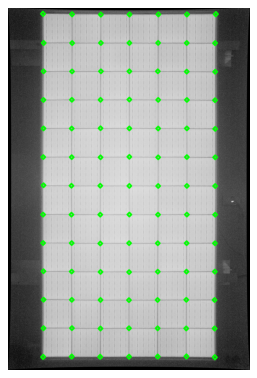

In [96]:
# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
 
# Method 1 to undistort the image
dst = cv2.undistort(image, mtx, dist, None, newcameramtx)
 
# Method 2 to undistort the image
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
 
dst = cv2.remap(image, mapx,mapy,cv2.INTER_LINEAR)
 
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dst)